## 15.1

In [2]:
# Загрузить библиотеки 
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors 
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
features = iris.data

# print(features)

# Создать стандартизатор 
standardizer = StandardScaler()

# Стандартизировать признаки
features_standardized = standardizer.fit_transform(features)

# Два ближайших соседа 
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)

# Создать наблюдение 
new_observation = [ 1, 1, 1, 1]

# Найти расстояния и индексы ближайших соседей наблюдения 
distances, indices = nearest_neighbors.kneighbors([new_observation])

print(features_standardized[indices])

[[[1.03800476 0.55861082 1.10378283 1.18556721]
  [0.79566902 0.32841405 0.76275827 1.05393502]]]


## 15.2

In [34]:
# Загрузить библиотеки
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets

# Загрузить данные
iris = datasets.load_iris()
X = iris.data 
y = iris.target

print(iris)

# Создать стандартизатор 
standardizer = StandardScaler()

# Стандартизировать признаки
X_std = standardizer.fit_transform(X)

# Натренировать классификатор KNN c 5 соседями
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)

# Создать два наблюдения
new_observations = [[ 0.75, 0.75, 0.75, 0.75], [ 1 , 1 , 1 , 1 ] ]

# Предсказать класс двух наблюдений 
print(knn.predict(new_observations))

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Лаб. работа 2

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

C:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


3. Перекрестная проверка: 0.8418279569892473
Точность: [0.62295082 0.62295082 0.67213115 0.7        0.61666667]
Полнота: [0.72727273 0.72727273 0.72727273 0.78787879 0.66666667]
Прецизионность: [0.63157895 0.63157895 0.68571429 0.7027027  0.64705882]
AUC: 0.6598814229249013


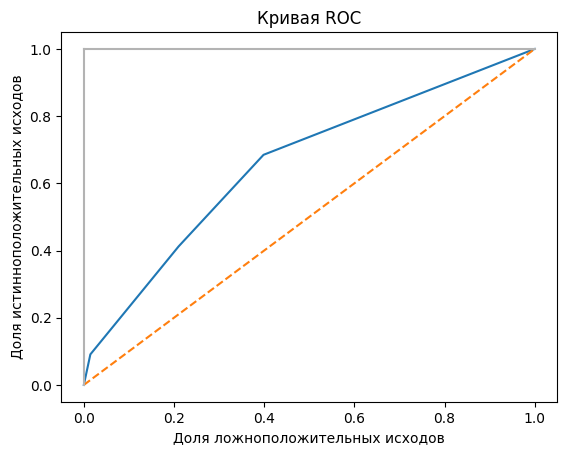

In [45]:
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors 
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.pipeline import make_pipeline 
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split

dataframe = pd.read_csv("heart.csv")

na_number = dataframe.isna().sum()

features = dataframe.iloc[:,:13]
target = dataframe.iloc[:,-1:]

print(features)
print(target)

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
logit = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
logit.fit(features_standardized, target.values.ravel())
 
scaler = StandardScaler()
X_std = scaler.fit_transform(features)
knn = KNeighborsClassifier(n_neighbors=13, n_jobs=-1).fit(X_std, target)

model = knn

print("2. Модель:", model)
# print(logit)

pipeline = make_pipeline(scaler, model)
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_results = cross_val_score(pipeline, # Конвейер
    features, # Матрица признаков
    target.values.ravel(), # Вектор целей
    cv=kf, # Метод перекрестной проверки
    scoring="accuracy", # Функция потери
    n_jobs=-1
) # Использовать все ядра CPU

# Вычислить среднее значение 
# print(f"3. Перекрестная проверка: {cv_results.mean()}")

target_probabilities = model.predict_proba(features)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(target, target_probabilities)
auc = roc_auc_score(target, target_probabilities)

accuracy = cross_val_score(model, features.values, target.values.ravel(), scoring="accuracy")
precision = cross_val_score(model, features, target.values.ravel(), scoring="precision")
recall = cross_val_score(model, features, target.values.ravel(), scoring="recall")
print(f"3. Перекрестная проверка: {cv_results.mean()}")
print(f"Точность: {accuracy}")
print(f"Полнота: {recall}")
print(f"Прецизионность: {precision}")
print(f"AUC: {auc}")

# Построить график кривой ROC 
plt.title("Кривая ROC")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel("Доля истинноположительных исходов") 
plt.xlabel("Доля ложноположительных исходов") 
plt.show()